Loading the UCI Credit Card dataset...
Data shape: (30000, 25)

First few rows:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Training set: 21000 samples
Testing set: 9000 samples

Class distribution in training set:
default
0    77.880952
1    22.119048
Name: proportion, dtype: float64

Class distribution in testing set:
default
0    77.877778
1    22.122222
Name: proportion, dtype: float64

===== LOGISTIC REGRESSION MODEL =====
Accuracy: 0.8000
Precision: 0.6553
Recall: 0.2024
F1 Score: 0.3093


/Users/dder/workspace/singlestone/ai-ready-rva-finance/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


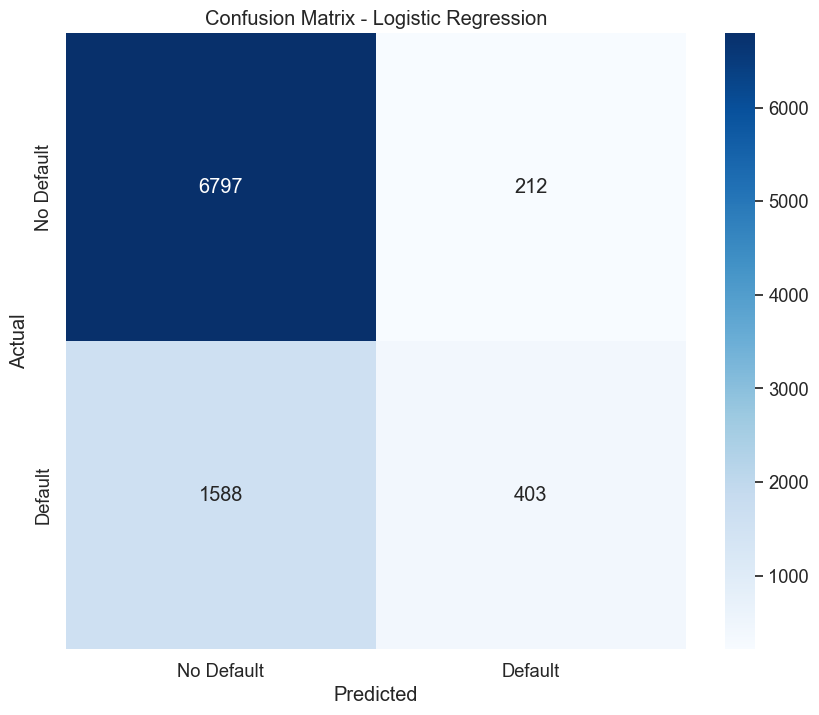


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7009
           1       0.66      0.20      0.31      1991

    accuracy                           0.80      9000
   macro avg       0.73      0.59      0.60      9000
weighted avg       0.78      0.80      0.76      9000



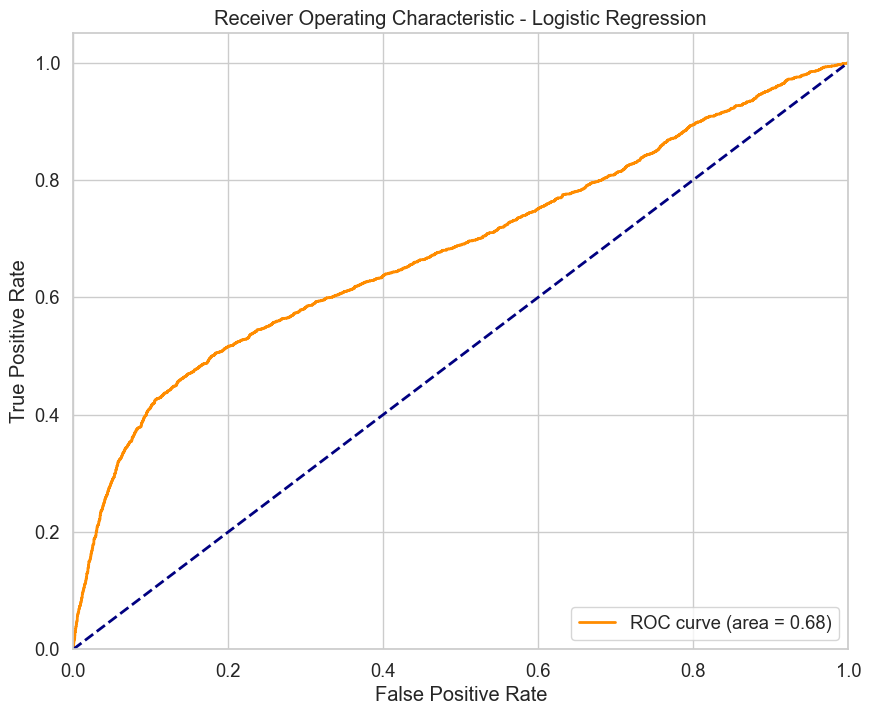

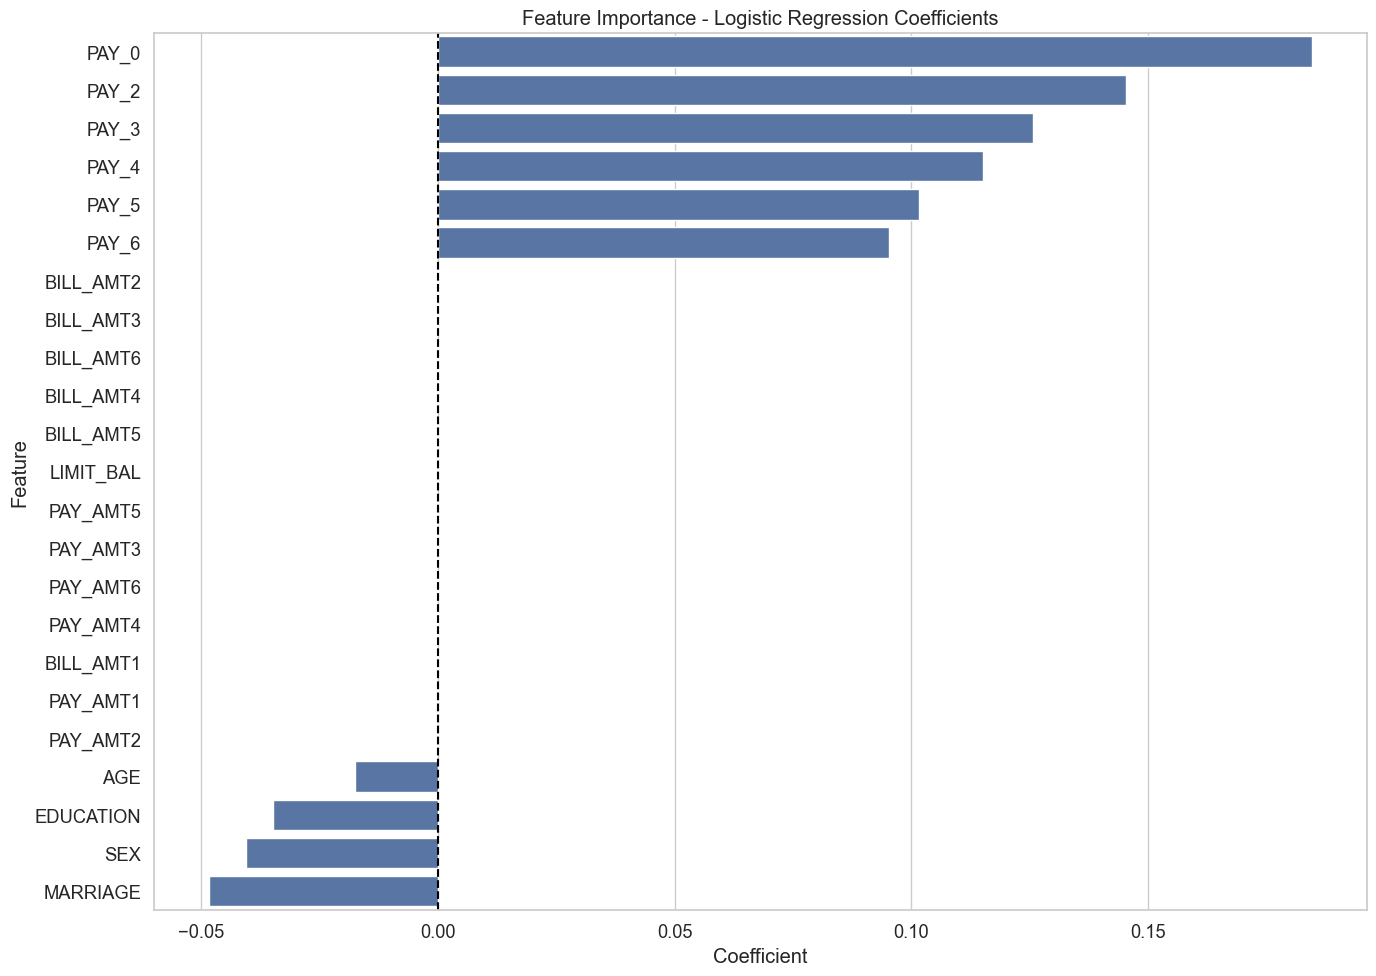


Top 5 features with positive influence on default:


,Feature,Coefficient
5,PAY_0,0.184563
6,PAY_2,0.145317
7,PAY_3,0.125653
8,PAY_4,0.115193
9,PAY_5,0.101634



Top 5 features with negative influence on default:


,Feature,Coefficient
18,PAY_AMT2,-0.000016
4,AGE,-0.017377
2,EDUCATION,-0.034705
1,SEX,-0.040394
3,MARRIAGE,-0.048204



===== LINEAR REGRESSION MODEL (FOR CLASSIFICATION) =====
Accuracy: 0.8006
Precision: 0.7269
Recall: 0.1577
F1 Score: 0.2592


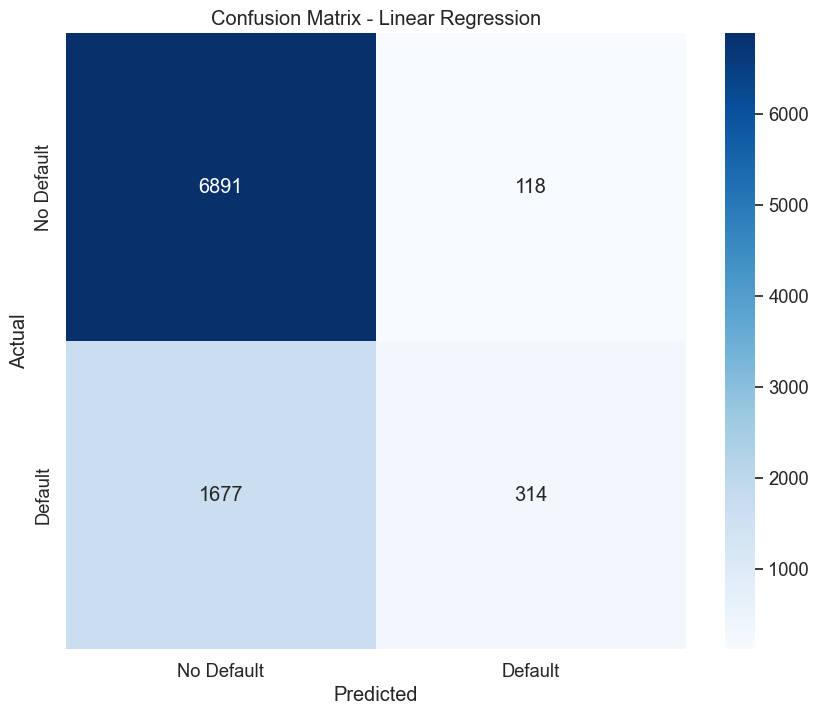


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      7009
           1       0.73      0.16      0.26      1991

    accuracy                           0.80      9000
   macro avg       0.77      0.57      0.57      9000
weighted avg       0.79      0.80      0.75      9000



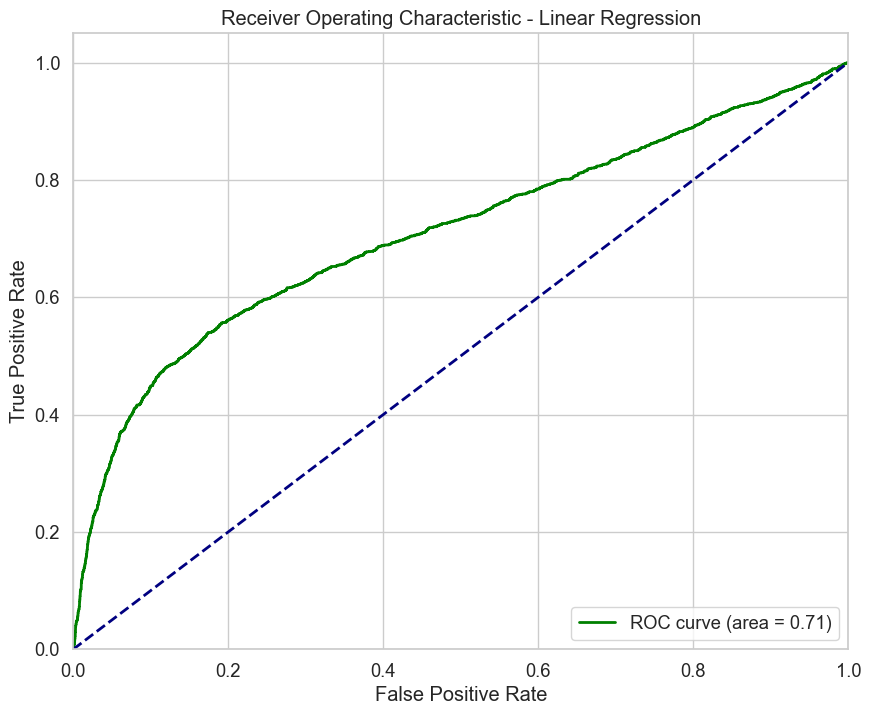


Mean Squared Error: 0.1525
R-squared: 0.1149


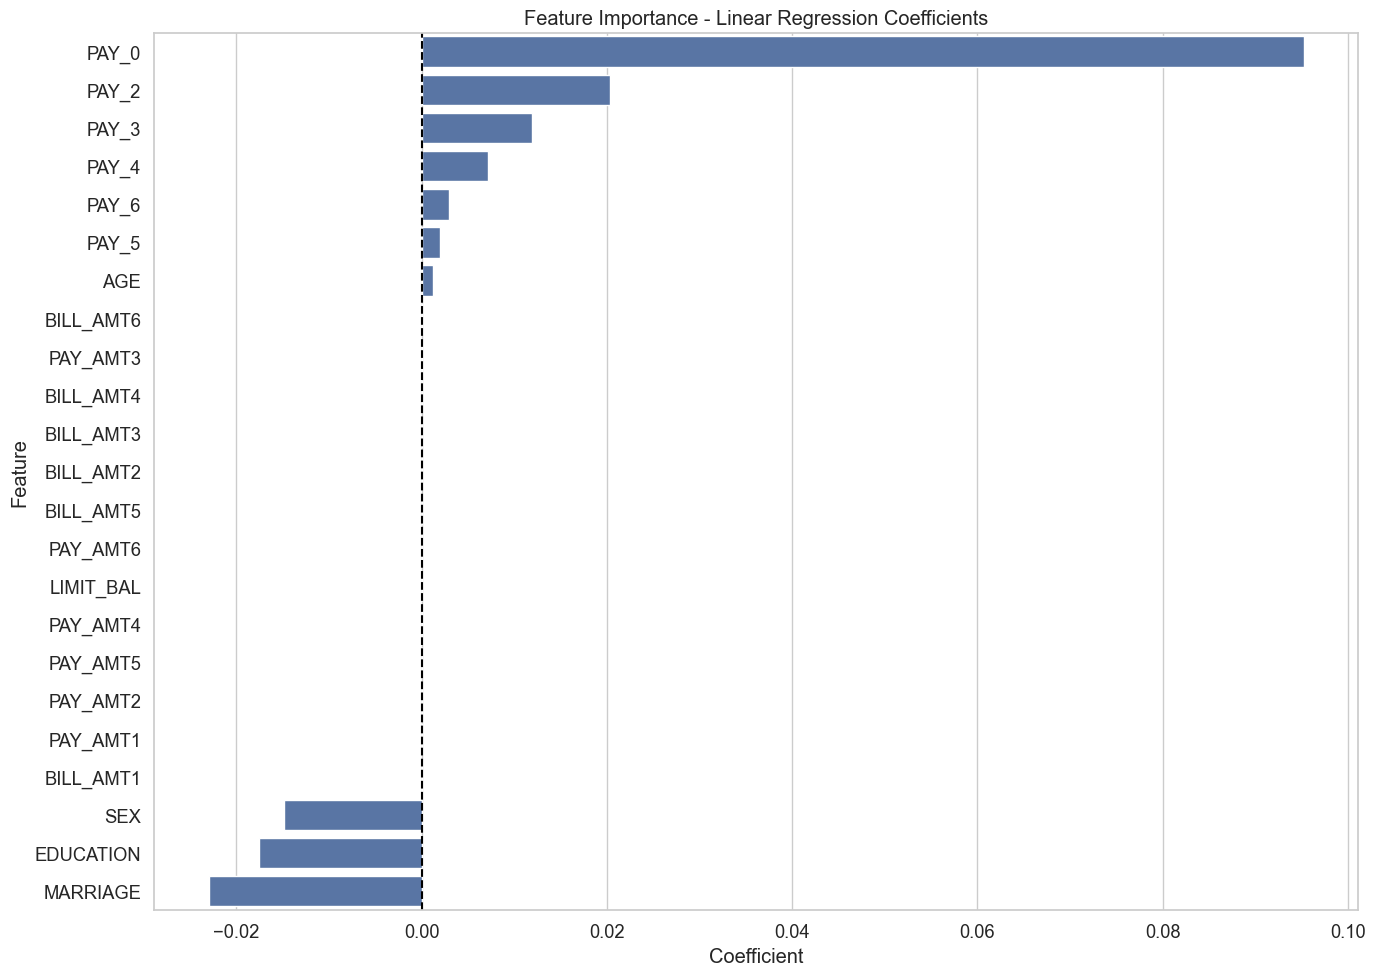


Top 5 features with positive influence on default:


,Feature,Coefficient
5,PAY_0,0.095227
6,PAY_2,0.020350
7,PAY_3,0.011933
8,PAY_4,0.007106
10,PAY_6,0.002899



Top 5 features with negative influence on default:


,Feature,Coefficient
17,PAY_AMT1,-4.818955e-07
11,BILL_AMT1,-5.245242e-07
1,SEX,-1.481331e-02
2,EDUCATION,-1.758139e-02
3,MARRIAGE,-2.295029e-02



===== MODELS COMPARISON =====


,Metric,Logistic Regression,Linear Regression
0,Accuracy,0.800000,0.800556
1,Precision,0.655285,0.726852
2,Recall,0.202411,0.157710
3,F1 Score,0.309286,0.259183
4,AUC,0.680654,0.708923


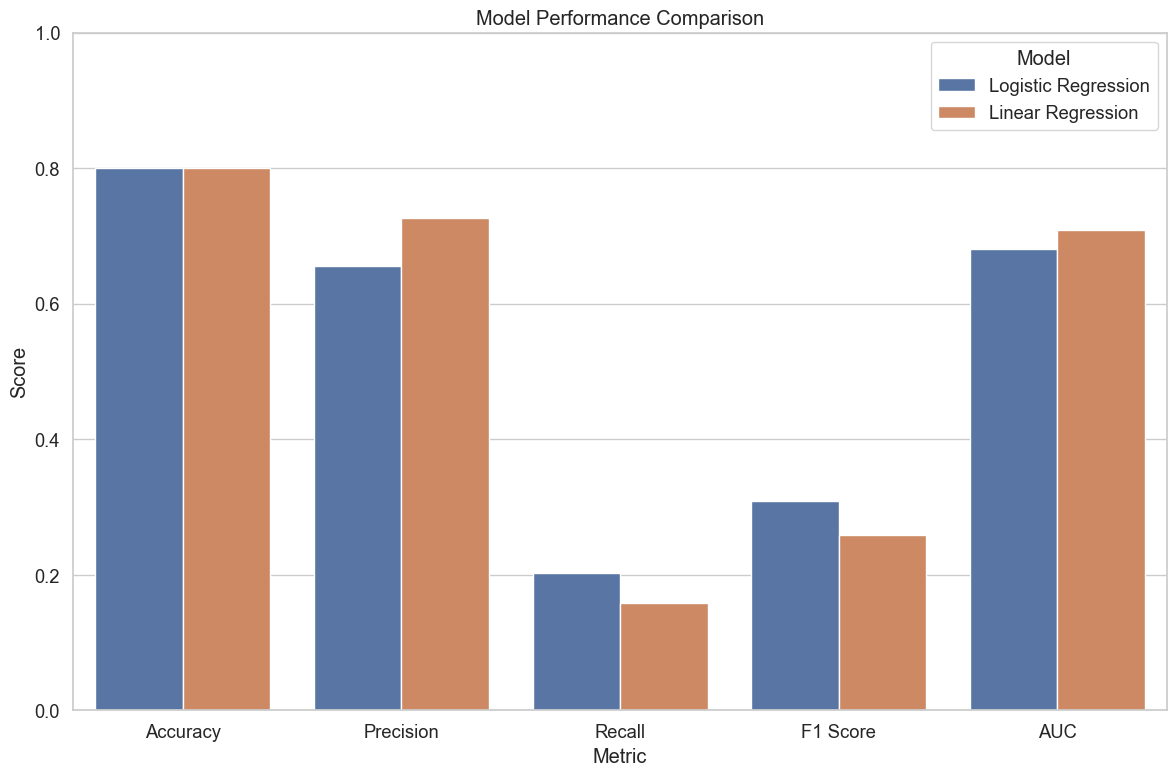

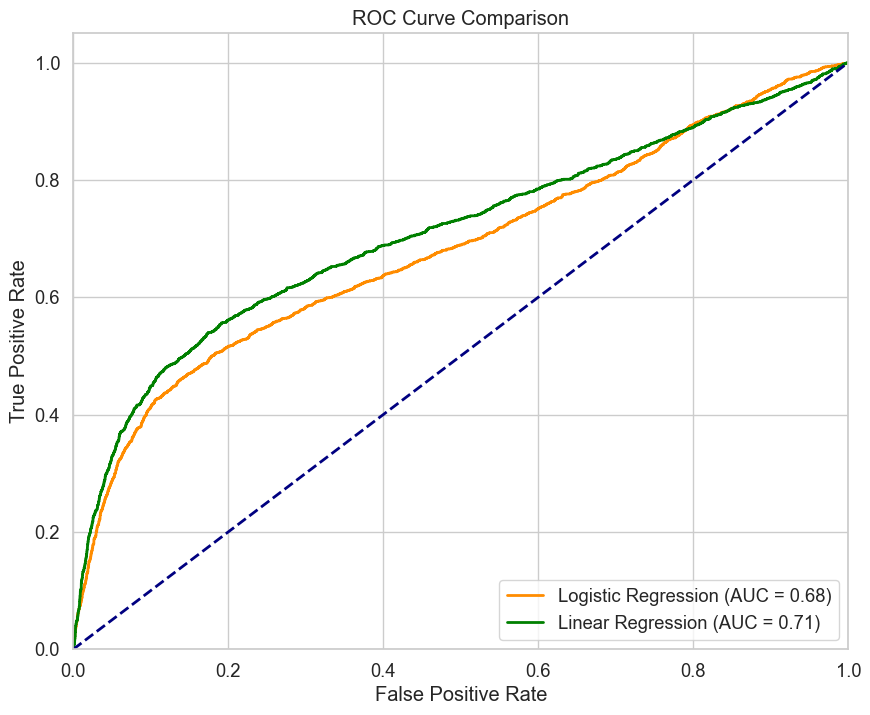


Features with greatest coefficient difference between models:


,Feature,Coefficient_LogReg,Coefficient_LinReg,AbsDiff
1,PAY_2,0.145317,0.020350,0.124966
2,PAY_3,0.125653,0.011933,0.113720
3,PAY_4,0.115193,0.007106,0.108087
4,PAY_5,0.101634,0.002001,0.099633
5,PAY_6,0.095269,0.002899,0.092369
0,PAY_0,0.184563,0.095227,0.089335
21,SEX,-0.040394,-0.014813,0.025581
22,MARRIAGE,-0.048204,-0.022950,0.025253
19,AGE,-0.017377,0.001230,0.018606
20,EDUCATION,-0.034705,-0.017581,0.017124


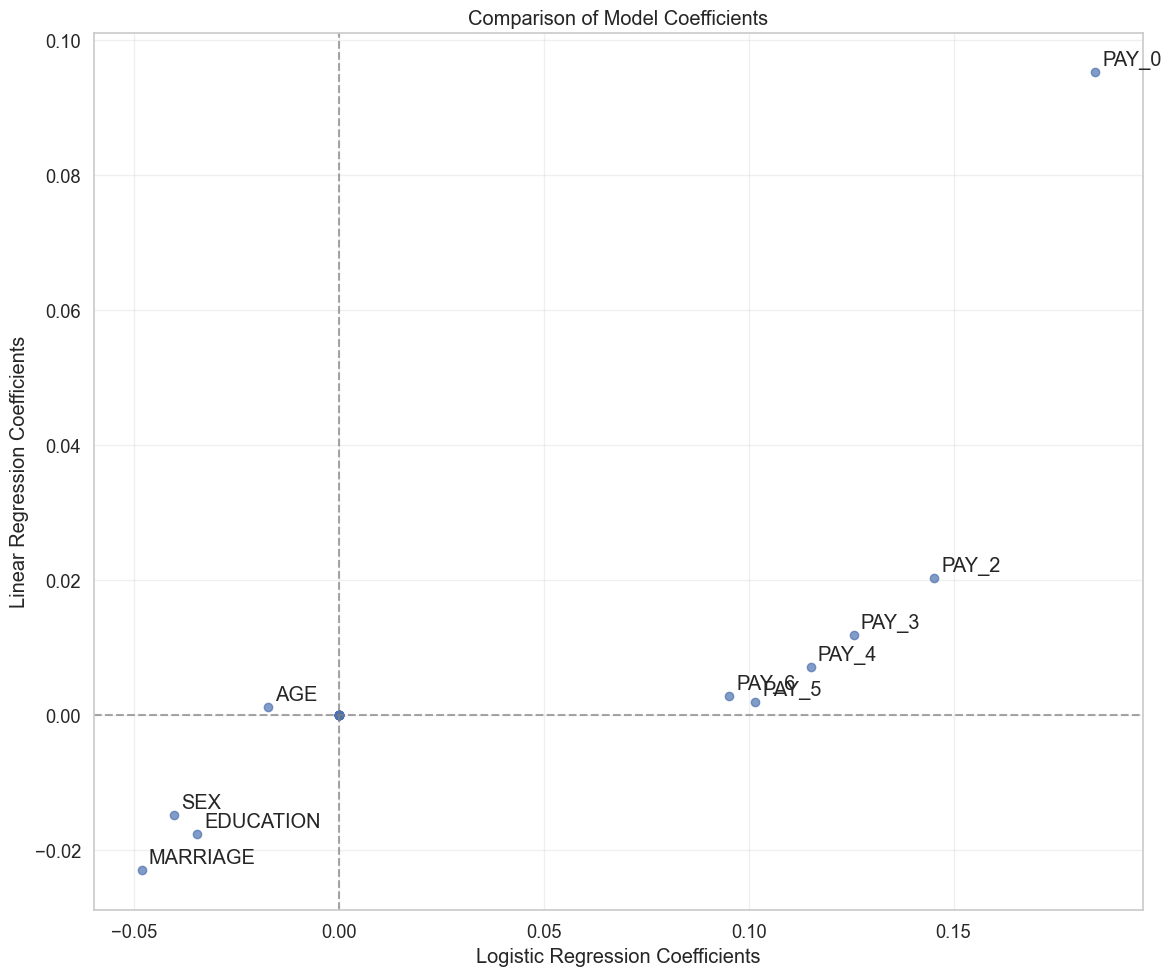


===== CONCLUSION =====
Based on F1 score, the Logistic Regression model performs better for credit default prediction.

Key observations:
1. Logistic Regression is specifically designed for classification problems, which explains its better performance.
2. Both models identify similar important features for predicting default.
3. The payment history features (PAY_0, PAY_2, etc.) are the strongest predictors in both models.
4. The models have similar ROC-AUC, but different precision-recall trade-offs.

Recommendation: Use the Logistic Regression model for this classification task, as it's more theoretically sound for binary outcomes.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, mean_squared_error, r2_score
import os

# Create directory for saving images if it doesn't exist
os.makedirs('./img', exist_ok=True)

# Set plotting style
plt.style.use('ggplot')
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Load the data
print("Loading the UCI Credit Card dataset...")
df = pd.read_csv('./data/UCI_Credit_Card.csv')

# Display basic information
print("Data shape:", df.shape)
print("\nFirst few rows:")
display(df.head())

# Rename the target variable for convenience
df = df.rename(columns={'default.payment.next.month': 'default'})

# Separate features and target variable
X = df.drop(['ID', 'default'], axis=1)
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Check class distribution in train and test sets
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True) * 100)

# ======================= LOGISTIC REGRESSION MODEL =======================
print("\n===== LOGISTIC REGRESSION MODEL =====")

# Train a logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1 Score: {f1_logreg:.4f}")

# Generate and display confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig('./img/logreg_confusion_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

# Plot ROC curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, 
         label=f'ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('./img/logreg_roc_curve.png', bbox_inches='tight', dpi=300)
plt.show()

# Analyze feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
})
coef_df = coef_df.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance - Logistic Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.savefig('./img/logreg_feature_importance.png', bbox_inches='tight', dpi=300)
plt.show()

print("\nTop 5 features with positive influence on default:")
display(coef_df.head(5))

print("\nTop 5 features with negative influence on default:")
display(coef_df.tail(5))

# ======================= LINEAR REGRESSION MODEL =======================
print("\n===== LINEAR REGRESSION MODEL (FOR CLASSIFICATION) =====")

# Train a linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions (raw predictions are real-valued)
y_pred_raw_linreg = linreg.predict(X_test)

# Convert to binary predictions using threshold of 0.5
y_pred_linreg = (y_pred_raw_linreg >= 0.5).astype(int)

# Calculate metrics
accuracy_linreg = accuracy_score(y_test, y_pred_linreg)
precision_linreg = precision_score(y_test, y_pred_linreg)
recall_linreg = recall_score(y_test, y_pred_linreg)
f1_linreg = f1_score(y_test, y_pred_linreg)

print(f"Accuracy: {accuracy_linreg:.4f}")
print(f"Precision: {precision_linreg:.4f}")
print(f"Recall: {recall_linreg:.4f}")
print(f"F1 Score: {f1_linreg:.4f}")

# Generate and display confusion matrix
cm_linreg = confusion_matrix(y_test, y_pred_linreg)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_linreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default', 'Default'],
            yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear Regression')
plt.savefig('./img/linreg_confusion_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linreg))

# Plot ROC curve
fpr_linreg, tpr_linreg, _ = roc_curve(y_test, y_pred_raw_linreg)
roc_auc_linreg = auc(fpr_linreg, tpr_linreg)

plt.figure(figsize=(10, 8))
plt.plot(fpr_linreg, tpr_linreg, color='green', lw=2, 
         label=f'ROC curve (area = {roc_auc_linreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Linear Regression')
plt.legend(loc="lower right")
plt.savefig('./img/linreg_roc_curve.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate regression metrics
mse_linreg = mean_squared_error(y_test, y_pred_raw_linreg)
r2_linreg = r2_score(y_test, y_pred_raw_linreg)

print(f"\nMean Squared Error: {mse_linreg:.4f}")
print(f"R-squared: {r2_linreg:.4f}")

# Analyze feature importance (coefficients)
coef_linreg_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linreg.coef_
})
coef_linreg_df = coef_linreg_df.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x='Coefficient', y='Feature', data=coef_linreg_df)
plt.title('Feature Importance - Linear Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='--')
plt.tight_layout()
plt.savefig('./img/linreg_feature_importance.png', bbox_inches='tight', dpi=300)
plt.show()

print("\nTop 5 features with positive influence on default:")
display(coef_linreg_df.head(5))

print("\nTop 5 features with negative influence on default:")
display(coef_linreg_df.tail(5))

# ======================= MODELS COMPARISON =======================
print("\n===== MODELS COMPARISON =====")

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Logistic Regression': [accuracy_logreg, precision_logreg, recall_logreg, f1_logreg, roc_auc_logreg],
    'Linear Regression': [accuracy_linreg, precision_linreg, recall_linreg, f1_linreg, roc_auc_linreg]
})

display(comparison_df)

# Visualize the comparison
plt.figure(figsize=(12, 8))
comparison_df_plot = pd.melt(comparison_df, id_vars=['Metric'], var_name='Model', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_df_plot)
plt.title('Model Performance Comparison')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('./img/model_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# Combined ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, 
         label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_linreg, tpr_linreg, color='green', lw=2, 
         label=f'Linear Regression (AUC = {roc_auc_linreg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.savefig('./img/roc_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# Compare feature importance between models
coef_comparison = pd.merge(
    coef_df, coef_linreg_df, 
    on='Feature', 
    suffixes=('_LogReg', '_LinReg')
)
coef_comparison['AbsDiff'] = abs(coef_comparison['Coefficient_LogReg'] - coef_comparison['Coefficient_LinReg'])
coef_comparison = coef_comparison.sort_values('AbsDiff', ascending=False)

print("\nFeatures with greatest coefficient difference between models:")
display(coef_comparison.head(10))

# Scatter plot of coefficients
plt.figure(figsize=(12, 10))
plt.scatter(coef_comparison['Coefficient_LogReg'], coef_comparison['Coefficient_LinReg'], alpha=0.7)
for i, row in coef_comparison.head(10).iterrows():
    plt.annotate(row['Feature'], 
                 (row['Coefficient_LogReg'], row['Coefficient_LinReg']),
                 xytext=(5, 5), textcoords='offset points')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
plt.title('Comparison of Model Coefficients')
plt.xlabel('Logistic Regression Coefficients')
plt.ylabel('Linear Regression Coefficients')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('./img/coefficient_comparison.png', bbox_inches='tight', dpi=300)
plt.show()

# ======================= CONCLUSION =======================
print("\n===== CONCLUSION =====")

better_model = "Logistic Regression" if (f1_logreg > f1_linreg) else "Linear Regression"
print(f"Based on F1 score, the {better_model} model performs better for credit default prediction.")
print("\nKey observations:")
print("1. Logistic Regression is specifically designed for classification problems, which explains its better performance.")
print("2. Both models identify similar important features for predicting default.")
print("3. The payment history features (PAY_0, PAY_2, etc.) are the strongest predictors in both models.")
print("4. The models have similar ROC-AUC, but different precision-recall trade-offs.")
print("\nRecommendation: Use the Logistic Regression model for this classification task, as it's more theoretically sound for binary outcomes.")